In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
with open("C://Data//hislight_pickles//HL3_restricted_dark.pickle", 'rb') as handle:
    restricted = pickle.load(handle)
    
with open('C://Data//hislight_pickles//HL3_adlib_light.pickle', 'rb') as handle:
    light = pickle.load(handle)
    
with open('C://Data//hislight_pickles//HL3_adlib_dark.pickle', 'rb') as handle:
    dark = pickle.load(handle)

with open('C://Data//hislight_pickles//HL3_adlib_sucralose.pickle', 'rb') as handle:
    sucralose = pickle.load(handle)    
    

In [4]:
mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL303", "HL304"]

#HL313 - HL318 are control mice

In [7]:
list_of_mice = []

for key, val in restricted.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in list_of_mice :
            list_of_mice.append(val["mouse_ID"])

In [8]:
list_of_mice

['HL301',
 'HL302',
 'HL305',
 'HL306',
 'HL307',
 'HL308',
 'HL309',
 'HL310',
 'HL311',
 'HL312']

In [15]:
def get_snips(data):

    snips_mean_start= []
    snips_mean_end = []
    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=10
    binlength=0.1

    for mouse in list_of_mice:
        snips_start = []
        snips_end = []
        snips_full = []

        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 10:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
                snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=mineventlength)
                snips_full.append(snipper.snips)


        snips_start = np.vstack(snips_start)
        snips_end = np.vstack(snips_end)
        snips_full = np.vstack(snips_full)

        snips_mean_start.append(np.mean(snips_start, axis=0))
        snips_mean_end.append(np.mean(snips_end, axis=0))
        snips_mean_full.append(np.mean(snips_full, axis=0))

    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_start, snips_mean_end, snips_mean_full

In [18]:
light_start, light_end, light_full = get_snips(light)
dark_start, dark_end, dark_full = get_snips(dark)
restricted_start, restricted_end, restricted_full = get_snips(restricted)
sucralose_start, sucralose_end, sucralose_full = get_snips(sucralose)

In [26]:
colors_adlib_light = "#F266AB"
colors_adlib_dark = "#FFB84C"
colors_restricted = "#90219c"
colors_sucralose = "#2CD3E1"


colors = ["#D83F31", "#EE9322", "#219C90","#E9B824"]

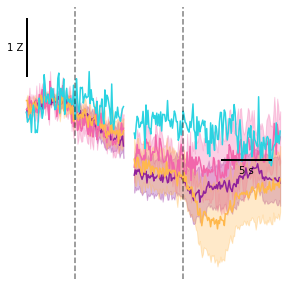

In [27]:
f, ax =plt.subplots(figsize=[5,5])

pre = 5
post = 10
mineventlength=10
binlength=0.1

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

#restricted
x1_restricted = np.arange(0,bins_early)
x2_restricted = np.arange(restricted_full.shape[1] - bins_late, restricted_full.shape[1])

mean_restricted = np.mean(restricted_full, axis=0)
error_values_restricted = np.std(restricted_full, axis=0) / np.sqrt(len(restricted_full))

ax.plot(x1_restricted, mean_restricted[:bins_early], color=colors_restricted)
ax.plot(x2_restricted, mean_restricted[-bins_late:], color=colors_restricted)

ax.fill_between(x1_restricted, mean_restricted[:bins_early]-error_values_restricted[:bins_early], 
                mean_restricted[:bins_early]+error_values_restricted[:bins_early], 
                color=colors_restricted, alpha=0.3)
ax.fill_between(x2_restricted, mean_restricted[-bins_late:]-error_values_restricted[-bins_late:], 
                mean_restricted[-bins_late:]+error_values_restricted[-bins_late:], 
                color=colors_restricted, alpha=0.3)

# adlib light

x1_light = np.arange(0,bins_early)
x2_light = np.arange(light_full.shape[1] - bins_late, light_full.shape[1])

mean_light = np.mean(light_full, axis=0)
error_values_light = np.std(light_full, axis=0) / np.sqrt(len(light_full))

ax.plot(x1_light, mean_light[:bins_early], color=colors_adlib_light)
ax.plot(x2_light, mean_light[-bins_late:], color=colors_adlib_light)

ax.fill_between(x1_light, mean_light[:bins_early]-error_values_light[:bins_early], 
                mean_light[:bins_early]+error_values_light[:bins_early], 
                color=colors_adlib_light, alpha=0.3)
ax.fill_between(x2_light, mean_light[-bins_late:]-error_values_light[-bins_late:], 
                mean_light[-bins_late:]+error_values_light[-bins_late:], 
                color=colors_adlib_light, alpha=0.3)

# adlib dark

x1_dark = np.arange(0,bins_early)
x2_dark = np.arange(dark_full.shape[1] - bins_late, dark_full.shape[1])

mean_dark = np.mean(dark_full, axis=0)
error_values_dark = np.std(dark_full, axis=0) / np.sqrt(len(dark_full))

ax.plot(x1_dark, mean_dark[:bins_early], color=colors_adlib_dark)
ax.plot(x2_dark, mean_dark[-bins_late:], color=colors_adlib_dark)

ax.fill_between(x1_dark, mean_dark[:bins_early]-error_values_dark[:bins_early], 
                mean_dark[:bins_early]+error_values_dark[:bins_early], 
                color=colors_adlib_dark, alpha=0.3)
ax.fill_between(x2_dark, mean_dark[-bins_late:]-error_values_dark[-bins_late:], 
                mean_dark[-bins_late:]+error_values_dark[-bins_late:], 
                color=colors_adlib_dark, alpha=0.3)


# sucralose

x1_sucralose = np.arange(0,bins_early)
x2_sucralose = np.arange(sucralose_full.shape[1] - bins_late, sucralose_full.shape[1])

mean_sucralose = np.nanmean(sucralose_full, axis=0)
error_values_sucralose= np.std(sucralose_full, axis=0) / np.sqrt(len(sucralose_full))

ax.plot(x1_sucralose, mean_sucralose[:bins_early], color=colors_sucralose)
ax.plot(x2_sucralose, mean_sucralose[-bins_late:], color=colors_sucralose)

ax.fill_between(x1_sucralose, mean_sucralose[:bins_early]-error_values_sucralose[:bins_early], 
                mean_sucralose[:bins_early]+error_values_sucralose[:bins_early], 
                color=colors_sucralose, alpha=0.3)
ax.fill_between(x2_sucralose, mean_sucralose[-bins_late:]-error_values_sucralose[-bins_late:], 
                mean_dark[-bins_late:]+error_values_sucralose[-bins_late:], 
                color=colors_sucralose, alpha=0.3)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.plot([200,250], [-1,-1], linewidth=2, color="k")
ax.text(225,-1.1,"5 s", va="top", ha="center")

ax.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax.text(-3, 1, "1 Z", va="center", ha="right")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(160, color="k", linestyle="--", alpha=0.5)


#f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\HL3_diff_conditions.pdf")